# 1 Color Convolutional Neural Network Classification

In [1]:
import tensorflow as tf

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from tensorflow.keras.models import Model

In [3]:
fashion_mnist = tf.keras.datasets.fashion_mnist

In [4]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [5]:
x_train = x_train / 255.0
x_test = x_test / 255.0

In [6]:
x_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [7]:
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
x_train.shape

(60000, 28, 28, 1)

In [8]:
classes = len(set(y_train))
classes

10

### Building Model

In [14]:
# Usiamo le strided Convolutions invece di fare il maxpooling
i = Input(shape=x_train[0].shape)
x = Conv2D(32, (3, 3), strides=2, activation="relu")(i)
x = Conv2D(64, (3, 3), strides=2, activation="relu")(x)
x = Conv2D(128, (3, 3), strides=2, activation="relu")(x)
x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(512, activation="relu")(x)
x = Dropout(0.2)(x)
x = Dense(classes, activation="softmax")(x)

model = Model(i, x)

In [15]:
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [16]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 13, 13, 32)        320       
                                                                 
 conv2d_7 (Conv2D)           (None, 6, 6, 64)          18496     
                                                                 
 conv2d_8 (Conv2D)           (None, 2, 2, 128)         73856     
                                                                 
 flatten_2 (Flatten)         (None, 512)               0         
                                                                 
 dropout_4 (Dropout)         (None, 512)               0         
                                                                 
 dense_3 (Dense)             (None, 512)               2626

In [17]:
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=15)

Epoch 1/15
1875/1875 [==============================] - 16s 8ms/step - loss: 0.5180 - accuracy: 0.8080 - val_loss: 0.3986 - val_accuracy: 0.8487
Epoch 2/15
1875/1875 [==============================] - 15s 8ms/step - loss: 0.3559 - accuracy: 0.8654 - val_loss: 0.3613 - val_accuracy: 0.8674
Epoch 3/15
1875/1875 [==============================] - 15s 8ms/step - loss: 0.3069 - accuracy: 0.8862 - val_loss: 0.3236 - val_accuracy: 0.8822
Epoch 4/15
1875/1875 [==============================] - 16s 8ms/step - loss: 0.2749 - accuracy: 0.8969 - val_loss: 0.2994 - val_accuracy: 0.8915
Epoch 5/15
1875/1875 [==============================] - 15s 8ms/step - loss: 0.2481 - accuracy: 0.9070 - val_loss: 0.2917 - val_accuracy: 0.8937
Epoch 6/15
1875/1875 [==============================] - 16s 8ms/step - loss: 0.2267 - accuracy: 0.9150 - val_loss: 0.2915 - val_accuracy: 0.8956
Epoch 7/15
1875/1875 [==============================] - 15s 8ms/step - loss: 0.2086 - accuracy: 0.9209 - val_loss: 0.2989 - val_ac

### Testing

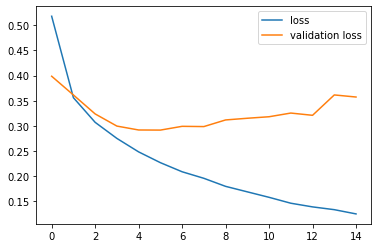

In [18]:
plt.plot(r.history["loss"], label="loss")
plt.plot(r.history["val_loss"], label="validation loss")
plt.legend()

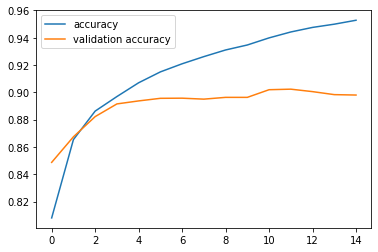

In [20]:
plt.plot(r.history["accuracy"], label="accuracy")
plt.plot(r.history["val_accuracy"], label="validation accuracy")
plt.legend()

Confusion matrix without normalization
[[888   2  17  14   1   1  73   0   4   0]
 [  3 975   1  12   3   1   4   0   1   0]
 [ 25   0 821  11  53   0  86   0   4   0]
 [ 17  15  12 887  33   0  33   0   3   0]
 [  3   1  60  19 829   0  86   0   2   0]
 [  1   0   0   1   0 972   0  16   3   7]
 [119   2  60  23  83   0 701   0  12   0]
 [  0   0   0   0   0   9   0 964   0  27]
 [  3   0   8   3   4   1   6   1 972   2]
 [  1   0   0   0   0   5   0  22   1 971]]


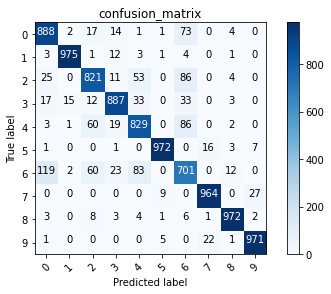

In [22]:
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes, normalize=False, title="confusion_matrix", cmap=plt.cm.Blues):

    if normalize:
        cm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized Confusion Matrix")
    else:
        print("Confusion matrix without normalization")

    print(cm)

    plt.imshow(cm, interpolation="nearest", cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = ".2f" if normalize else "d"
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i,j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel("True label")
    plt.xlabel("Predicted label")
    plt.show()

p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

In [23]:
labels= [
    "T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle Boot"
]

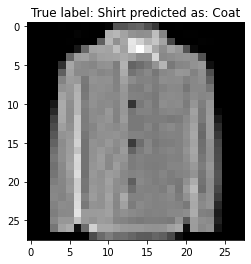

In [29]:
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i].reshape(28,28), cmap="gray")
plt.title(f"True label: {labels[y_test[i]]} predicted as: {labels[p_test[i]]}");

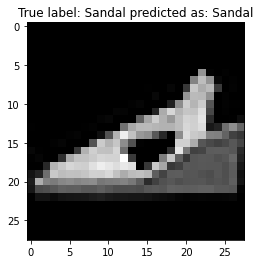

In [32]:
good_classified_idx = np.where(p_test == y_test)[0]
i = np.random.choice(good_classified_idx)
plt.imshow(x_test[i].reshape(28,28), cmap="gray")
plt.title(f"True label: {labels[y_test[i]]} predicted as: {labels[p_test[i]]}");